## Topic : Senic Data project - Different plots and Regression

### 1. Uploading the dataset 'sonic (1).txt 

In [1]:
import pandas as pd
senic = pd.read_table('senic (1).txt')
senic

,ID,Length,Age,InR,RCra,RCXra,Beds,ACen,Nurse,AFaS,MedAf,Region
1,1,7.13,55.7,4.1,9.0,39.6,279,207,241,60.0,No,W
2,2,8.82,58.2,1.6,3.8,51.7,80,51,52,40.0,No,NC
3,3,8.34,56.9,2.7,8.1,74.0,107,82,54,20.0,No,S
4,4,8.95,53.7,5.6,18.9,122.8,147,53,148,40.0,No,W
5,5,11.20,56.5,5.7,34.5,88.9,180,134,151,40.0,No,NE
...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,11.80,53.8,5.7,9.1,116.9,571,441,469,62.9,Yes,NC
110,110,9.50,49.3,5.8,42.0,70.9,98,68,46,22.9,No,S
111,111,7.70,56.9,4.4,12.2,67.9,129,85,136,62.9,No,W
112,112,17.94,56.2,5.9,26.4,91.8,835,791,407,62.9,Yes,NE


In [4]:
region = senic.Region.value_counts()
region

S     37
NC    32
NE    28
W     16
Name: Region, dtype: int64

### 2. Creating a pie chart for the Region variable with Title, labels with the percentages for each slice.

In [5]:
region = senic.Region.value_counts()
region

S     37
NC    32
NE    28
W     16
Name: Region, dtype: int64

([<matplotlib.patches.Wedge at 0x1e7fe93a2b0>,
 [Text(0.5727206582552293, 0.9508370247354154, 'S'),
  Text(-1.0890462792753985, 0.21465833689007094, 'NC'),
  Text(-0.10783935346808984, -1.1047491452106148, 'NE'),
  Text(1.0019803075290596, -0.47763528274612554, 'W')],
 [Text(0.31473837976188274, 0.5225320586383814, '32.74%'),
  Text(-0.598484892214408, 0.11796539234499394, '28.32%'),
  Text(-0.05926306812210341, -0.6071143951157433, '24.78%'),
  Text(0.5506378266601137, -0.262484254482105, '14.16%')])

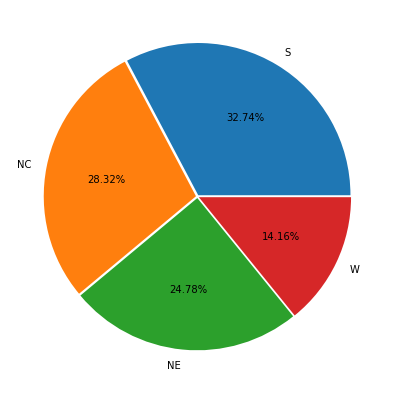

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.pie(region,labels=['S','NC','NE','W'],explode=(0.01,0.01,0.01,0.01),autopct='%.2f%%')

### 3. Hypothesis testing to determine if the mean infection risk is less than 5%. Also, fiding the 99% confidence intervals for the mean infection risk.
#### H0 : u = 0.05 vs H1 : u < 0.05

In [8]:
import scipy.stats as scist
ttest_stat,ttest_pval = scist.ttest_1samp(senic.InR,0.05,alternative='less')
ttest_stat,ttest_pval

(34.12714988845517, 1.0)

As the p-value is 1.0 which is the maximum, the null hypothesis is acceptedted and it implies that the mean infection risk is 5% .

#### Calculation for the 99% Confidence Interval

In [113]:
c_level_a = scist.t.ppf(0.01,112)
c_level_b = scist.t.ppf(1,112)
c_level_a,c_level_b

(-2.360103972336328, inf)

### 4. Calculating the sample mean, variance, 5th percentile, 72nd percentile, and 80th percentile of the average daily census variable. 

In [137]:
import statistics as st
Avg_ACen = st.mean(senic.ACen)
Var_ACen = st.variance(senic.ACen)
print('Sample Mean and Variance are 'f'{Avg_ACen:.3f}'' and 'f'{Var_ACen:.3f}')

Sample Mean and Variance are 191.372 and 23642.003


In [130]:
import numpy as np
for i in [5,72,80]:
    print('{:.0F}th percentile is {:.2F}'.format(i,np.quantile(senic.ACen,i/100)))

5th percentile is 40.00
72th percentile is 240.64
80th percentile is 311.00


### 5. Creating a multi-panel image that has four scatterplots in the first row (Nurse should be the explanatory variable for each, RCra, AFaS, Length, and Age should be the response variables), two histograms in the second row (one for RCra and one for RCXra, each should be the length of two of the scatterplots from the first row), and a single multiple boxplot in the third row that shows the distribution of Age for each of the Regions. 

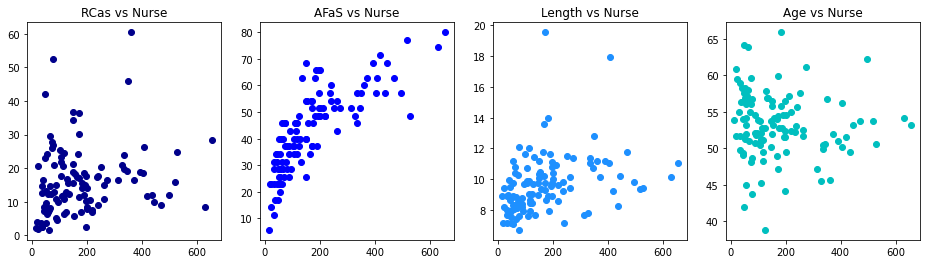

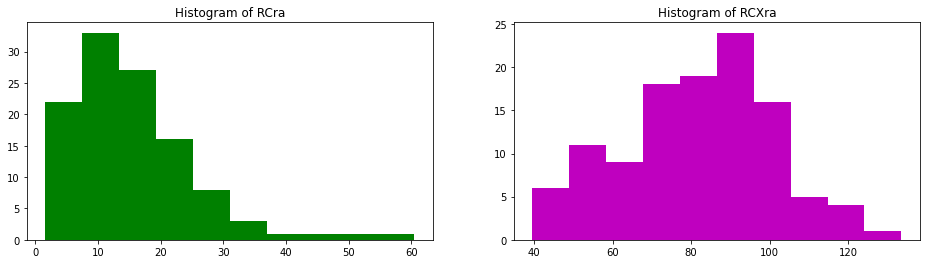

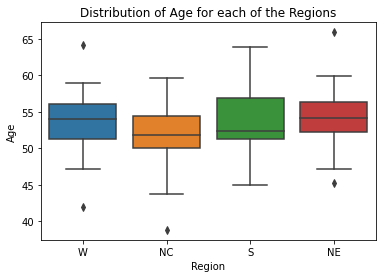

In [12]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.scatter(senic.Nurse,senic.RCra,color='darkblue')
plt.title("RCas vs Nurse")
plt.subplot(142)
plt.scatter(senic.Nurse,senic.AFaS,color='b')
plt.title("AFaS vs Nurse")
plt.subplot(143)
plt.scatter(senic.Nurse,senic.Length,color='dodgerblue')
plt.title("Length vs Nurse")
plt.subplot(144)
plt.scatter(senic.Nurse,senic.Age,color='c')
plt.title("Age vs Nurse")
plt.show()
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.hist(senic.RCra,color='g')
plt.title("Histogram of RCra")
plt.subplot(122)
plt.hist(senic.RCXra,color='m')
plt.title("Histogram of RCXra")
plt.show()
plt.subplot()
import seaborn as sb
sb.boxplot(x=senic.Region,y=senic.Age)
plt.title("Distribution of Age for each of the Regions")
plt.show()


### 6. Regression analysis using ACen as the response variable and Beds as the explanatory variable.

In [73]:
import numpy as np
Explo_data = np.array(senic.Beds).reshape(-1,1)
Respo_data = np.array(senic.ACen)

In [23]:
Explo_data , Respo_data

(array([[279],
        [ 80],
        [107],
        [147],
        [180],
        [150],
        [186],
        [640],
        [182],
        [ 85],
        [768],
        [167],
        [322],
        [ 97],
        [ 72],
        [387],
        [108],
        [133],
        [134],
        [833],
        [ 95],
        [195],
        [270],
        [600],
        [298],
        [546],
        [170],
        [176],
        [248],
        [167],
        [318],
        [210],
        [196],
        [312],
        [221],
        [266],
        [ 90],
        [ 60],
        [196],
        [ 73],
        [166],
        [113],
        [130],
        [362],
        [115],
        [831],
        [306],
        [593],
        [106],
        [305],
        [252],
        [620],
        [535],
        [157],
        [ 76],
        [281],
        [ 70],
        [318],
        [445],
        [191],
        [119],
        [595],
        [ 68],
        [ 83],
        [489],
        [508],
        [2

In [28]:
from sklearn.linear_model import LinearRegression as lr
model = lr().fit(Explo_data,Respo_data)

In [49]:
print('Correration between Beds and ACen is {}'.format(model.score(Explo_data,Respo_data)))

Correration between Beds and ACen is 0.9623565710681561


In [43]:
print('β0 and β1 are {} and {} respectively.'.format(model.intercept_ , model.coef_[0]))

β0 and β1 are -5.869316306724073 and 0.7821804787738136 respectively.


So, the Simple linear regression equn. can be written as,
    Y = 0.78218X - 5.86932 ; Y denotes the ACen and X denotes the Beds.

In [71]:
x_bar = senic.Beds.mean()
y_bar = senic.ACen.mean()
x_bar , y_bar

(252.16814159292036, 191.3716814159292)

Now, the previous equn. can also be represented as,

# Y - Ybar = byx(X - Xbar) 

So,  (Y - 191.37168) = 0.78218(X - 252.16814) ; 0.78218 = b'

### Testing of regression coefficient
#### H0 : byx = b0 vs H1 : byx ≠ b0
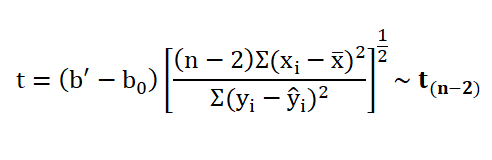

In [78]:
n = senic.Beds.count()
(n-2)

111

### Calculating 90% confidence intervals for the regression coefficient.

In [80]:
import scipy.stats as scist
a , b = scist.t.ppf(0.05,111) , scist.t.ppf(0.95,111)
a , b

(-1.658697265409974, 1.6586972654099734)

## Submitted by,
### Soumitro Mukherjee
#### Reg. No. : 213001818010030  ,  Roll No. : 30018021030
### M.Sc. in Applied Statistics and Analytics